## Trabajo final ML

### Grupo:

- Carlos Mauricio Arteaga
- Miguel Angel Pablos Perea

In [2]:
## Librerias
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica
import matplotlib.pyplot as plt

In [3]:
import os
print(os.getcwd())

d:\EAN_Curso_Machine_Learning_1\Machine_Learning_1_EAN\Codigo\Talleres


In [4]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

In [5]:
df_1 = pd.read_csv('../../Datos/churn-bigml-80.csv')

df_1


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [6]:
df_2 = pd.read_csv('../../Datos/churn-bigml-20.csv')

df_2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [7]:
#Concatenamos los dos dataframes para ajustar a las preferencias propias en las divisiones de train y test
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)  # Concatenamos los dos dataframes
df


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


## Analisis exploratorio (EDA)

In [8]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Descripcion del conjunto de datos

El DataFrame presentado fue tomado de la siguiente direccion url: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

### Descripcion general de las columnas

- 'State' : estado de residencia del cliente, representado por su abreviatura de dos letras.
- 'Account length': Tiempo del cliente en la compañia en dias.
- 'Area code': Código de área.
- 'International plan': Indica si el cliente tiene contratado un plan de llamadas internacionales.
- 'Voice mail plan': Indica si el cliente tiene un plan de correo de voz.
- 'Number vmail messages'. Número de mensajes de correo de voz.
- 'Total day minutes': Total de minutos en el  dia.
- 'Total day calls': Total de llamas en el dia.
- 'Total day charge': Valor cargado al cliente por los minutos utilizados en el dia.
- 'Total eve minutes': Tolal de minutos en la tarde.
- 'Total eve calls' : total de llamadas hechas en la tarde.
- 'Total eve charge': Valor cargado al cliente por los minutos utilizados en la tarde.
- 'Total night minutes': Total de minutos en la noche.
- 'Total night calls': Total llamadas en la noche.
- 'Total night charge': Valor cargado al cliente por los minutos utilizados en la noche.
- 'Total intl minutes': Total minutos en llamadas internacionales.
- 'Total intl calls': Total de llamadas internacionales.
- 'Total intl charge': Valor cargado al cliente por llamdas internacionales.
- 'Customer service calls': Numero de llamadas hechas al servicion de soporte.  
- 'Churn': Indica si el cliente ha abandonado el servicio o continua en la compañia.

El contexto del conjunto de datos esta centrado en la retencion de clientes, las columnas describen el comportamiento de los clientes en los servicios de telefonia, de una base de datos dipuradas para la compañia Orange Telecom.

El dataset tiene una variable objetivo 'Churn' que describe cuando un usuario cancela o no la subscripcion, esta columna describe un estado ideal para desarrollar modelos de clasificacion como:
- Regresio logistica
- Arboles de decision
- Rabdom forest
- XGBoost
- KNN

Adicional se pueden generar modelos de regresion para las variables numericas relacionadas con el consumo y finalmente modelos de clusterizacion para agrupar segmentos de clientes para personalizar estrategias de marketing identificando posibles patrones de uso, grupos con riesgo de abandono del servicio u otras necesidaes especiales.

## Descripcion del problema de negocio.

---



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
# Estado general del dataset
df.shape
#El dataset tiene 3333 filas y 20 columnas

(3333, 20)

#### Analisis de valores nulos.

In [11]:
missing_values = df.isnull().sum() # Suma los valores nulos
missing_values

# Encontramos que no hay datos faltantes en la base de datos, lo cual es bueno ya que no se tiene que realizar un proceso de imputacion de datos faltantes y analisis de los mismos.

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [12]:
#Creamos una copia del dataframe original para el proceso de transofrmación de datos

df_final = df.copy()
df_final

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [13]:
df_final['Churn'] = df_final['Churn'].astype(int)
df_final['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [14]:
# Descripción general de las variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [15]:
# Identificamos las variables categoricas y numericas
var_categoricas = df_final.select_dtypes(include=['object']).columns
var_numericas = df_final.select_dtypes(exclude=['object']).columns

print('Variables categoricas: ', var_categoricas)
print('------------------------------------------------')
print('Variables numericas: ', var_numericas)

Variables categoricas:  Index(['State', 'International plan', 'Voice mail plan'], dtype='object')
------------------------------------------------
Variables numericas:  Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn'],
      dtype='object')


## Distribucion de la variable objetivo

In [16]:
# Conteo de la variable objetivo
conteo_churn = df_final['Churn'].value_counts(normalize=True) * 100
print(conteo_churn)

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64


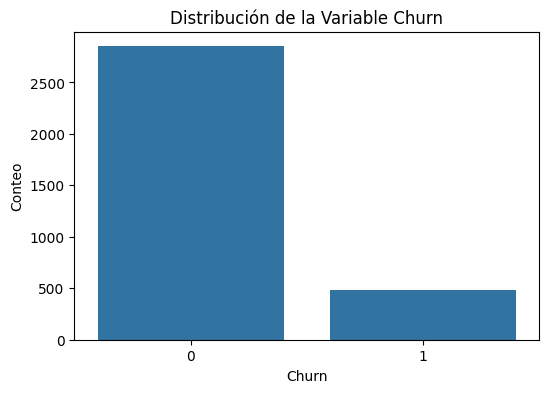

In [17]:
#Grafica de la variabe objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_final)
plt.title('Distribución de la Variable Churn')
plt.xlabel('Churn')
plt.ylabel('Conteo')
plt.show()

### Distribucion variables numericas.

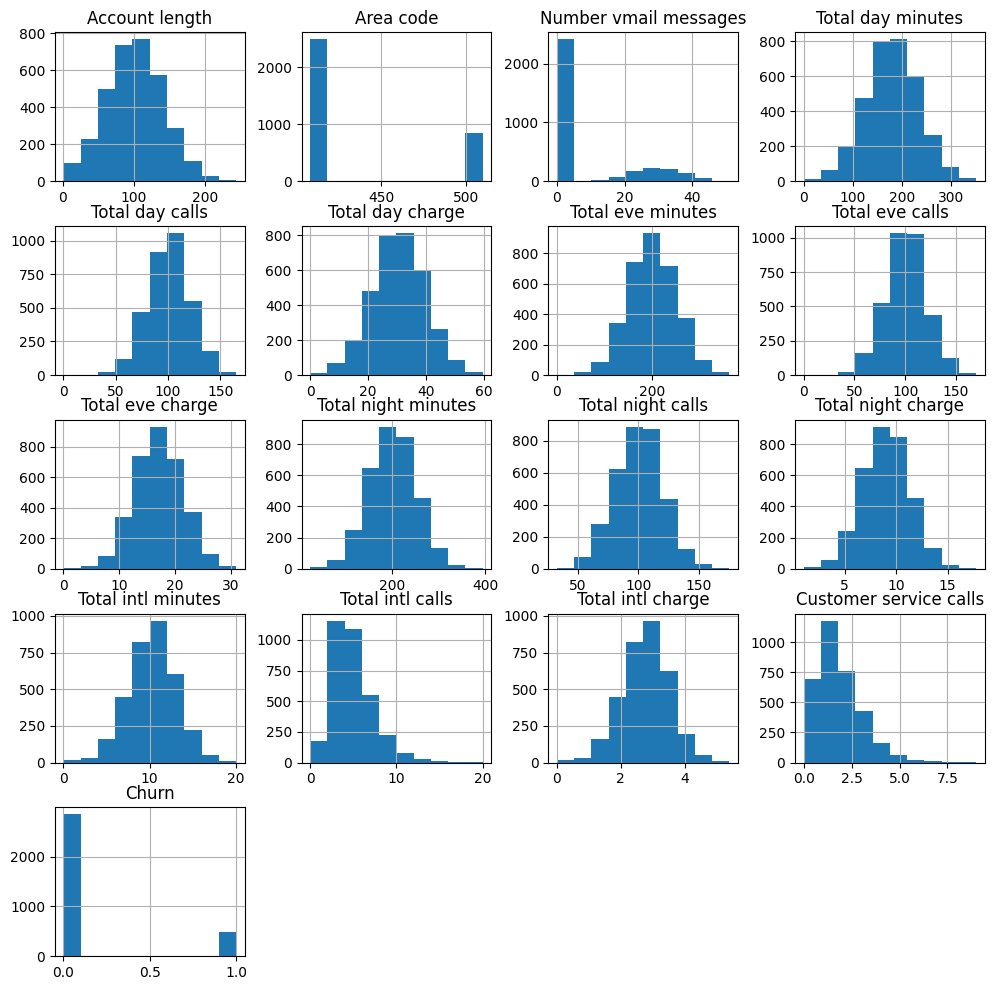

In [18]:
# Histograma de las variables numericas
df_final[var_numericas].hist(figsize=(12, 12))
plt.show()

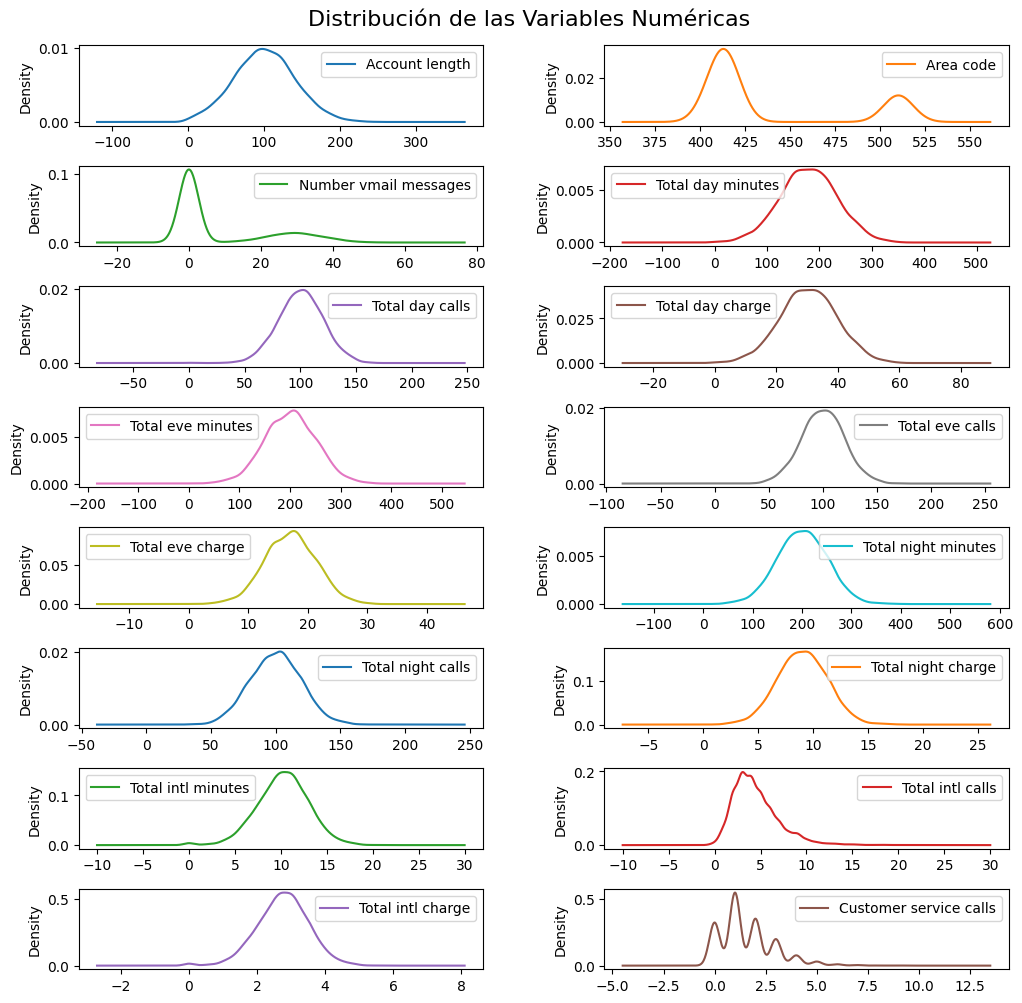

In [19]:
import math
import matplotlib.pyplot as plt

df_dist = df_final.select_dtypes(include=['int64', 'float64'])
n_cols = 2  # Número de columnas por fila
rows = math.ceil(df_dist.shape[1] / n_cols)

# Graficar con separación entre gráficos
df_dist.plot(kind='density', subplots=True, layout=(rows, n_cols), figsize=(12, 12), sharex=False)
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16, y=0.91)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


### Distribucion variables categoricas

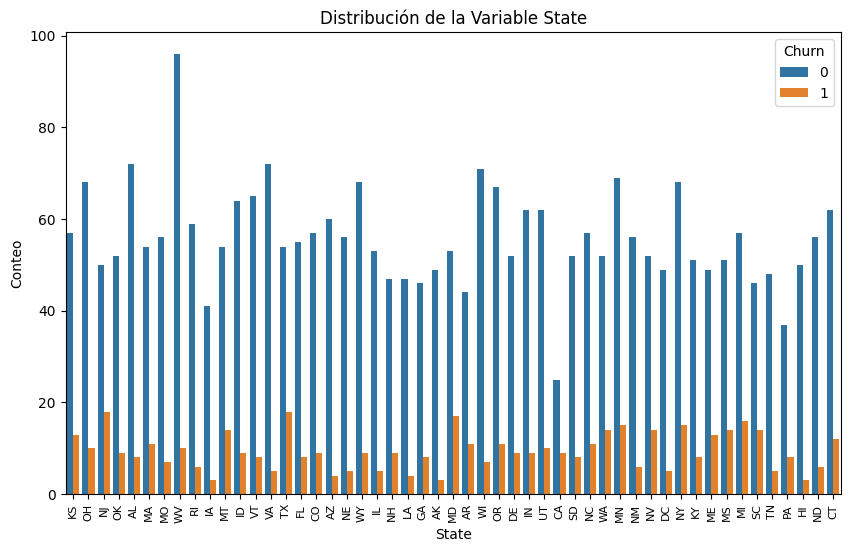

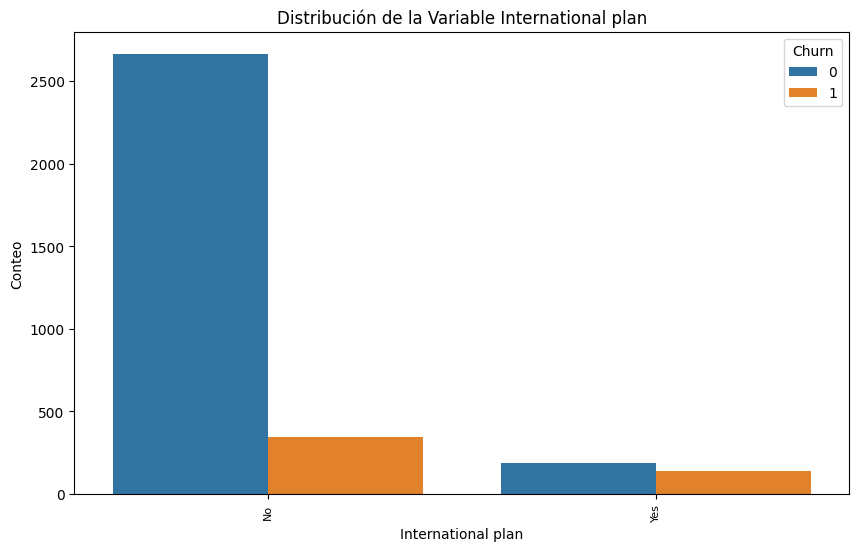

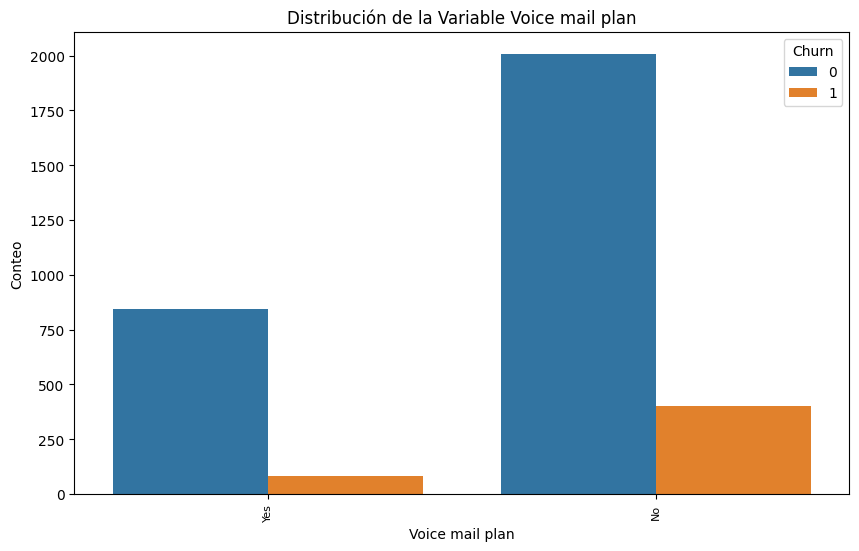

In [54]:
for col in var_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_final, hue='Churn')
    plt.title(f'Distribución de la Variable {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()


- Una gran proporción de personas que tiene planes internacionales se retiran del operador.
- Oportuniad de mejora: Reevaluar las alianzas con operadores en el exterior, mejorar costos.

## Boxplot variables numericas

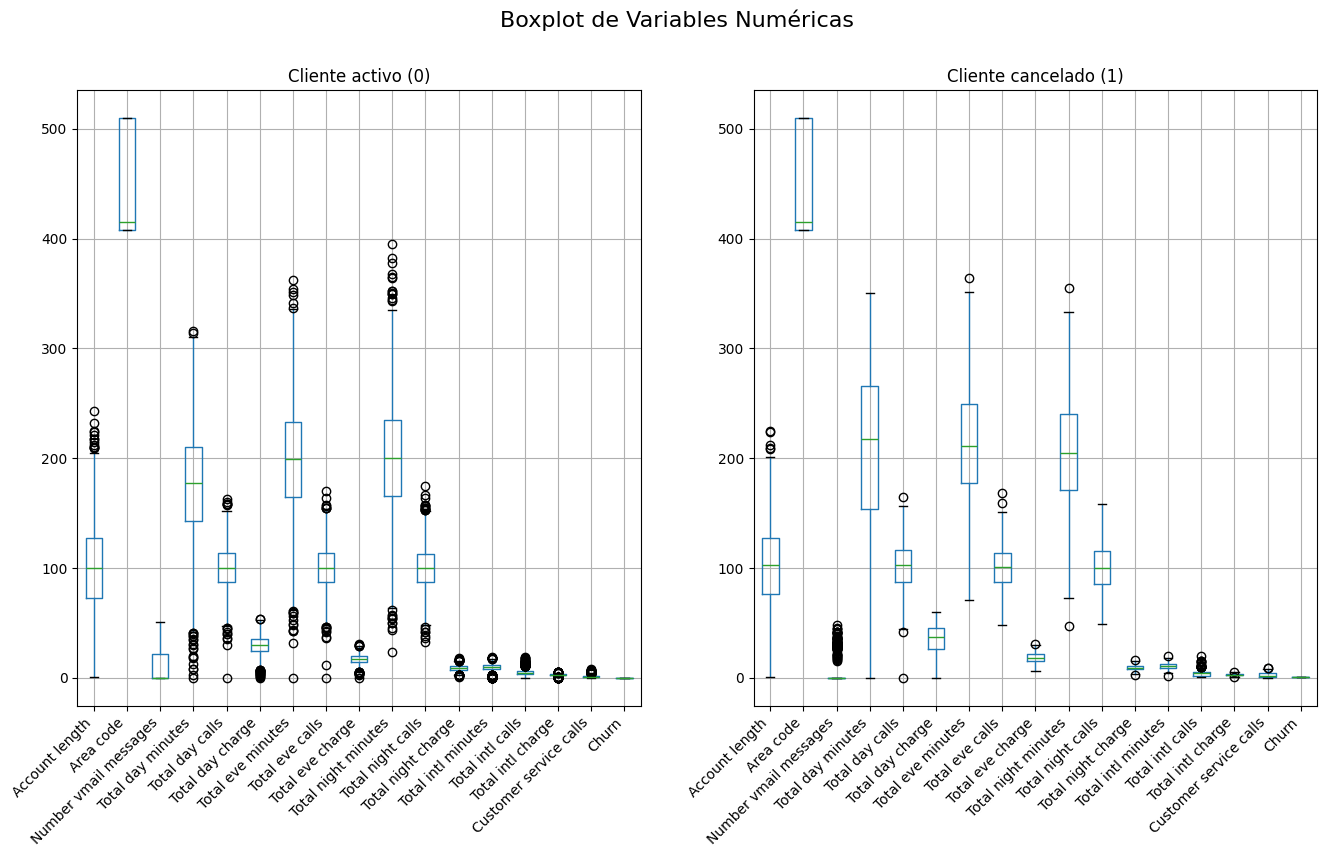

In [21]:
df_numerico = df_final.select_dtypes(exclude=['object'])

# Crear el boxplot agrupado por 'Aprobado'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
df_numerico[df_final['Churn'] == 0].boxplot(ax=axes[0], rot=45)
df_numerico[df_final['Churn'] == 1].boxplot(ax=axes[1], rot=45)

# Títulos para cada subplot
axes[0].set_title("Cliente activo (0)")
axes[1].set_title("Cliente cancelado (1)")

# Ajustar etiquetas en el gráfico izquierdo
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar título general
plt.suptitle("Boxplot de Variables Numéricas", fontsize=16)

plt.show()

## Matriz de correlacion

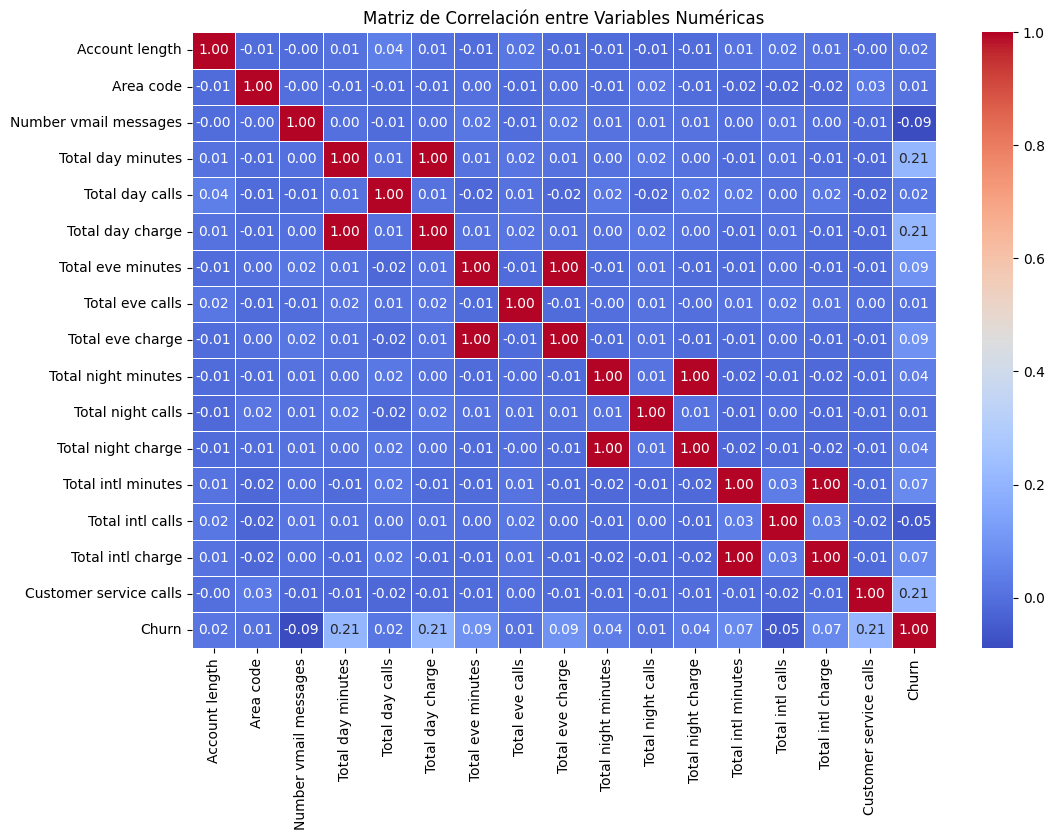

In [22]:
df_numerico = df_final.select_dtypes(exclude=['object'])


# Matriz de correlación
correlacion = df_numerico.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Estandarizacion de variables

In [23]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [24]:
#Variables categoricas y numericas
categorical_columns = df_final.select_dtypes(include='object').columns
numeric_columns = df_final.select_dtypes(exclude='object').columns.drop('Churn')

# Separar la variable objetivo
X = df_final.drop(columns='Churn')
y = df_final['Churn']

# Configuración del preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

X_final = preprocessor.fit_transform(X)

# Obtener nombres de columnas para las variables categóricas transformadas
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_columns = list(numeric_columns) + list(encoded_columns)

# Convertir X_final en un DataFrame con los nombres de las columnas
df_X_final= pd.DataFrame(X_final.toarray(), columns=all_columns)




In [25]:
# DataFrame final procesado
df_X_final.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Dividir el dataset

In [26]:
#Dividimos el conjunto de datos para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(df_X_final, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
#Definimos los modelos con los que vamos a probar el conjunto de datos inicialmente.

modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

#Entrenamos los modelos
for name, model in modelos.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluación de los modelos
model_scores = {}

for name, model in modelos.items():
    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Guardar los resultados en un diccionario
    model_scores[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion_Matrix': conf_matrix
    }

# Mostrar los resultados
for model, scores in model_scores.items():
    print(f"\n{model} Scores:")
    for metric, score in scores.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{score}")  # Mostrar la matriz de confusión sin formato
        else:
            print(f"{metric}:\n{score}")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
XGBoost trained.
KNN trained.
--------------------------------------------------------------------

Logistic Regression Scores:
Accuracy:
0.8605697151424287
Precision:
0.5434782608695652
Recall:
0.25773195876288657
F1 Score:
0.34965034965034963
Confusion_Matrix:
[[549  21]
 [ 72  25]]

Decision Tree Scores:
Accuracy:
0.9490254872563718
Precision:
0.9436619718309859
Recall:
0.6907216494845361
F1 Score:
0.7976190476190477
Confusion_Matrix:
[[566   4]
 [ 30  67]]

Random Forest Scores:
Accuracy:
0.9400299850074962
Precision:
0.9830508474576272
Recall:
0.5979381443298969
F1 Score:
0.7435897435897436
Confusion_Matrix:
[[569   1]
 [ 39  58]]

XGBoost Scores:
Accuracy:
0.9490254872563718
Precision:
0.9565217391304348
Recall:
0.6804123711340206
F1 Score:
0.7951807228915663
Confusion_Matrix:
[[567   3]
 [ 31  66]]

KNN Scores:
Accuracy:
0.8920539730134932
Precision:
0.9629629629629629
Recall:
0.26804123711340205
F1 Score

- En este problema de lo que mas afecta son los falsos negativos ya que son personas que se van pero el modelo no los detecta

## Explorando el Feture Importance (XGBoost model)

In [28]:
# Configuracion del modelo XGBoost

modelo_xgb = XGBClassifier(random_state=42,n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, use_label_encoder=False, eval_metric='logloss')

# Entrenamiento del modelo

modelo_xgb.fit(X_train, y_train)

c:\Users\aluca\miniconda3\envs\machine_learning_uno\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
# Predicciones en el conjunto de prueba
y_pred = modelo_xgb.predict(X_test)

In [30]:
#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)


Accuracy: 0.95
Matriz de Confusión:
[[566   4]
 [ 31  66]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.94      0.68      0.79        97

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667



## Resultados:

- Verdaderos Negativos (TN): 566 - El modelo predijo "No Churn" correctamente.
- Falsos Positivos (FP): 4 - El modelo predijo "Churn" cuando realmente era "No Churn".
- Falsos Negativos (FN): 31 - El modelo predijo "No Churn" cuando realmente era "Churn".
- Verdaderos Positivos (TP): 66 - El modelo predijo "Churn" correctamente.

## Analisis de metricas. 

### Accuracy 
- Accuracy: 95% el 95 porciento de las predicciones son correctas. <span style="color:orange"> (El problema sigue estando en los falsos negativos que son el problema de negocio en el cual se quiere trabajar son los mas costosos ya que son clientes en los cuales se hubiera podido trabajar pero que el modelo no vio). </span>

### Precision

- Precision Clase 0 (No Churn): para todas las predicciones de la clase 0 el 95% de las veces fueron correctas.
- Precision Clase 1 (Churn): para todas las predicciones de la clase 1 el 94% de las veces fueron correctas.
- El modelo es bastante preciso en ambas clases pero hay una disminucion en la clase 1 

### Recall 

- Recall clase 0: De todos los clientes que realmente no hicieron "Churn", el modelo identificó correctamente al 99%.
- Recall clase 1: De todos los clientes que realmente hicieron "Churn", el modelo solo identificó correctamente al 68%. <span style="color:orange"> Este debe ser el foco de mejora del modelo, el modelo esta ignorando clientes que se retiraron.</span>

### F1 Score

- F1 Score clase 0: 0.97
- F1 Score clse 1: 0.79
- El modelo tiene un buen F1 Score en ambas clases, pero notablemente menor en "Churn", lo cual es consistente con el bajo recall en esta clase.

### Soporte (Support):

- Nos ayuda a determinar que efectivamente nuestro dataset esta desbalanceado en la clase 1 y <span style="color:orange"> esto es un problema ya que nuestro problema de negocio es la identificacion de personas que dejan la compañia</span>


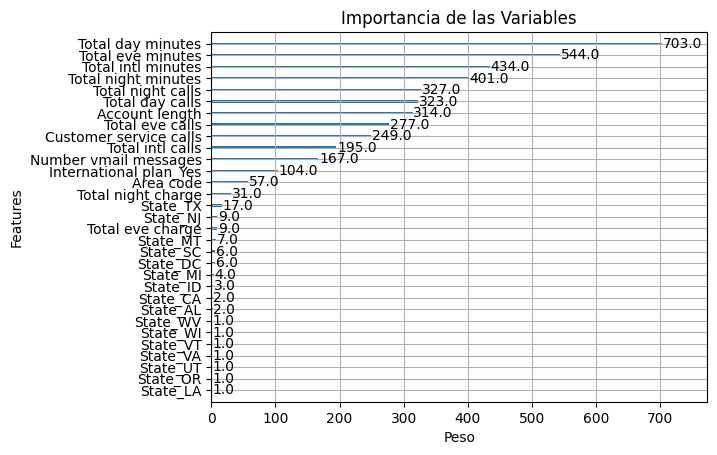

<Figure size 1600x1200 with 0 Axes>

In [31]:
import xgboost as xgb
xgb.plot_importance(modelo_xgb, importance_type='weight', title='Importancia de las Variables', xlabel='Peso')
plt.figure(figsize = (16, 12))
plt.show()

## Ajuste de hiperparametros.

- n_estimators: Número de árboles en el modelo. Más árboles pueden mejorar el rendimiento, pero también aumentan el tiempo de entrenamiento.
- max_depth: Profundidad máxima de cada árbol. Un valor mayor permite que el modelo aprenda patrones más complejos, pero aumenta el riesgo de sobreajuste.
- learning_rate: Tasa de aprendizaje. Un valor más bajo suele mejorar la precisión, pero puede requerir más iteraciones (es decir, un mayor número de árboles).
- subsample: Proporción de muestras que se usan para entrenar cada árbol. Ayuda a reducir el sobreajuste.
- colsample_bytree: Proporción de características que se usan para entrenar cada árbol. También ayuda a reducir el sobreajuste.
- scale_pos_weight: Este es especialmente importante para datos desbalanceados. Aumenta el peso de la clase minoritaria ("Churn") y ayuda a mejorar el recall.

https://xgboost.readthedocs.io/en/stable/parameter.html#global-configuration

In [63]:
from sklearn.model_selection import RandomizedSearchCV

#configuracion del modelo XGBoost para ajuste de hiperparametros
modelo_xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Definir los hiperparámetros a ajustar
parametros = { 
    'n_estimators': [100, 200, 300, 400, 500], #Numero de arboles
    'max_depth': [3, 5, 7, 10], #Profundidad de los arboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  #Tasa de aprendizaje
    'subsample': [0.6, 0.8, 1.0], #Muestra de filas, reducir overfitting
    'colsample_bytree': [0.6, 0.8, 1.0], #Muestra de columnas, reducir overfitting
    'scale_pos_weight': [1, 10, 25, 50, 75] #Balance de clases desbalanceadas.
}



random_search = RandomizedSearchCV(
    estimator=modelo_xgb,
    param_distributions=parametros,
    n_iter=12,  # Número de combinaciones aleatorias a probar
    scoring='recall',  # Usar recall como métrica de evaluación para mejorar la clase "Churn"
    cv=5,  # Validación cruzada
    verbose=1,
    n_jobs=-1,
    random_state=42
)

#Entrenamiento del modelo
random_search.fit(X_train, y_train)

#Mejores hiperparametros
print('Mejores hiperparámetros:')
print(random_search.best_params_)
print('Mejor puntuación de Recall:')
print(random_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros:
{'subsample': 1.0, 'scale_pos_weight': 25, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Mejor puntuación de Recall:
0.8835830835830836


c:\Users\aluca\miniconda3\envs\machine_learning_uno\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Prueba de nuevos hiperparametros

In [64]:
from sklearn.metrics import roc_auc_score

In [65]:

#Configuracion del modelo con los mejores hiperparametros
modelo_xgb = random_search.best_estimator_

#Entrenamiento del modelo
modelo_xgb.fit(X_train, y_train)

#Predicciones en el conjunto de prueba
y_pred = modelo_xgb.predict(X_test)

#Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Calculo del AUC
y_pred_proba = modelo_xgb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC_AUC: {roc_auc:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test, y_pred)
print('Reporte de Clasificación:')
print(class_report)




Accuracy: 0.69
ROC_AUC: 0.92
Matriz de Confusión:
[[369 201]
 [  9  88]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78       570
           1       0.30      0.91      0.46        97

    accuracy                           0.69       667
   macro avg       0.64      0.78      0.62       667
weighted avg       0.88      0.69      0.73       667



c:\Users\aluca\miniconda3\envs\machine_learning_uno\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:44:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Resultados.

- Recall para la clase "Churn" (0.91): Este valor indica que el modelo está logrando identificar correctamente el 91% de los clientes que efectivamente hicieron churn. esto es positivo ya que indica que el modelo es eficaz para capturar a la mayotia de los clientes con riesgo de abandonar el servicio. <span style="color:orange">de cada 100 clientes que estan en de hacer Churn el modelo identifica a 91 de ellos <span> y la empresa entonces puede generar planes de accion para mitigar el retiro de clientes. 
- Precisión para la clase "Churn" (0.30): La precisión en la clase churn es baja (30%), lo que significa que hay muchos falsos positivos, el modelo predice que hay clientes que haran Churn cuando en realidad no lo hacen. <span style="color:orange"> De cada 100 clientes que el modelo clasifica como en riesgo de churn, solo 30 realmente están en riesgo.<span> Esto implica que se podrian estar dedicando recursos a intentar retener clientes que no necesariamente estan en riesgo y esto puede estar generando costos innecesarios.
- Dado que el objetivo principal es minimizar el churn, es preferible tener un recall alto incluso a costa de una precisión baja, especialmente si <span style="color:orange">el costo de contactar a los clientes para retención es bajo en comparación con la pérdida que genera un cliente que hace churn.<span>
- En este caso priorizar el recall es adecuado si el principal objetivo es identificar la mayoría de los clientes en riesgo. La empresa puede optar por tomar acciones proactivas, como promociones o mejoras en el servicio, para aquellos identificados en riesgo de churn, sabiendo que aunque algunos de ellos no se irían, capturarán la mayoría de los que sí lo harían.
- mejora de la presicion para evitar falsas alertas. 

### Feature importance.



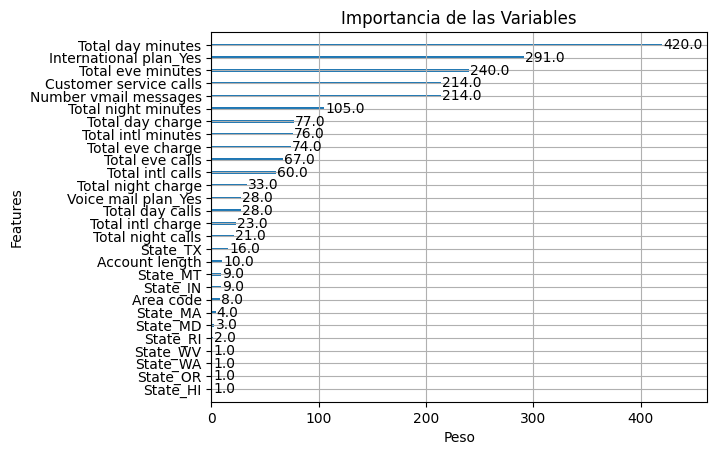

<Figure size 1600x1200 with 0 Axes>

In [34]:
import xgboost as xgb
xgb.plot_importance(modelo_xgb, importance_type='weight', title='Importancia de las Variables', xlabel='Peso')
plt.figure(figsize = (16, 12))
plt.show()

In [66]:
df_X_final.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_

In [101]:
#Hacer un nuevo dataframe con las variables que quiera analizar
df_xgboost = df_X_final[['Total day minutes',
                       'Total eve minutes', 
                       'International plan_Yes',
                       'Customer service calls',
                       'Number vmail messages', 
                       'Total night minutes',  
                       'Total intl minutes',
                       'Voice mail plan_Yes',
                       'Account length',
                       'Total intl calls']
                       ]
df_xgboost

,Total day minutes,Total eve minutes,International plan_Yes,Customer service calls,Number vmail messages,Total night minutes,Total intl minutes,Voice mail plan_Yes,Account length,Total intl calls
0,1.566767,-0.070610,0.0,-0.427932,1.234883,0.866743,-0.085008,1.0,0.676489,-0.601195
1,-0.333738,-0.108080,0.0,-0.427932,1.307948,1.058571,1.240482,1.0,0.149065,-0.601195
2,1.168304,-1.573383,0.0,-1.188218,-0.591760,-0.756869,0.703121,0.0,0.902529,0.211534
3,2.196596,-2.742865,1.0,0.332354,-0.591760,-0.078551,-1.303026,0.0,-0.428590,1.024263
4,-0.240090,-1.038932,1.0,1.092641,-0.591760,-0.276311,-0.049184,0.0,-0.654629,-0.601195
...,...,...,...,...,...,...,...,...,...,...
3328,-0.783616,-0.892994,0.0,0.332354,1.307948,0.924094,0.452353,1.0,0.324873,1.024263
3329,-1.766002,0.057580,0.0,-0.427932,1.527146,0.566148,-0.765665,1.0,0.123950,-0.601195
3330,0.259367,-2.287299,0.0,1.092641,-0.591760,0.182492,1.061361,0.0,-1.031361,1.430627
3331,-0.183166,-0.064693,0.0,-0.427932,-0.591760,-0.141834,0.488177,0.0,1.455068,-0.194831


In [102]:
#Dividir el conjunto de datos en entrenamiento y prueba
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df_xgboost, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
#Configuracion del modelo con los mejores hiperparametros
modelo_xgb = random_search.best_estimator_

#Entrenamiento del modelo
modelo_xgb.fit(X_train_f, y_train_f)

#Predicciones en el conjunto de prueba
y_pred_f = modelo_xgb.predict(X_test_f)

#Evaluacion del modelo
accuracy = accuracy_score(y_test_f, y_pred_f)
print(f'Accuracy: {accuracy:.2f}')

#Matriz de confusion
conf_matrix = confusion_matrix(y_test_f, y_pred_f)
print('Matriz de Confusión:')
print(conf_matrix)

#Reporte de clasificacion
class_report = classification_report(y_test_f, y_pred_f)
print('Reporte de Clasificación:')
print(class_report)

Accuracy: 0.62
Matriz de Confusión:
[[324 246]
 [  7  90]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.57      0.72       570
           1       0.27      0.93      0.42        97

    accuracy                           0.62       667
   macro avg       0.62      0.75      0.57       667
weighted avg       0.88      0.62      0.68       667



c:\Users\aluca\miniconda3\envs\machine_learning_uno\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


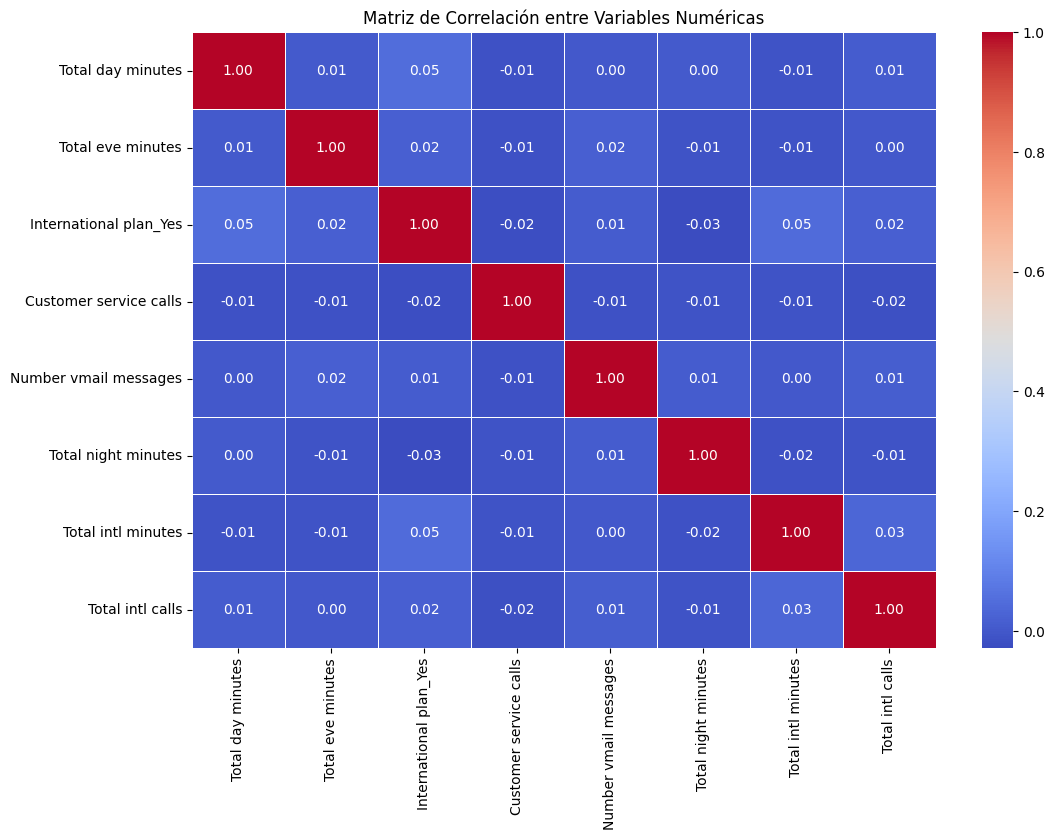

In [89]:
#matriz de coorelacion df_xgboost
correlacion = df_xgboost.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()